In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

In [39]:
# Generate fake data
x = np.random.normal(size=100000)
y = x * 3 + np.random.normal(size=100000)

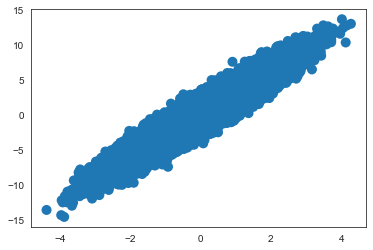

In [42]:
fig, ax = plt.subplots()
ax.scatter(x, y, s=100, edgecolors='none')

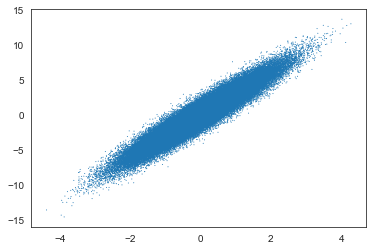

In [43]:
fig, ax = plt.subplots()
ax.scatter(x, y, s=1, edgecolors='none')

## Create Mock Data Set

In [7]:
# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

## Various Schemes: Built-in Package

### Basic 2D Histograms

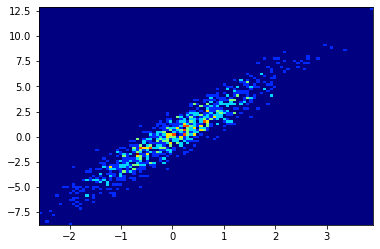

In [8]:
grid_plot = plt.hist2d(x, y, bins=(100, 100), cmap = "jet")

### Coloring Points Based on Density

In [9]:
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

In [10]:
print(xy.shape)
print(x.shape)
print(y.shape)

(2, 1000)
(1000,)
(1000,)


In [11]:
print(z[:5])

[0.04522281 0.09190974 0.04411161 0.01766106 0.11167038]


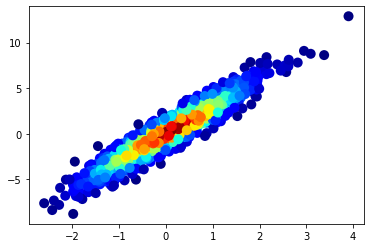

In [13]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, cmap = "jet", s=100, edgecolor='none')

### Smoother Mesh Plot

Let’s consider that you want to study the relationship between 2 numerical variables with a lot of points. Then you can consider the number of points on each part of the plotting area and thus calculate a 2D kernel density estimate. It is like a smoothed histogram. Instead of a point falling into a particular bin, it adds a weight to surrounding bins.

In [14]:
nbins=300
k = gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

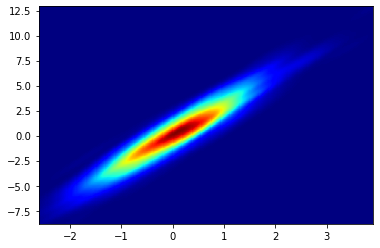

In [15]:
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap = "jet")

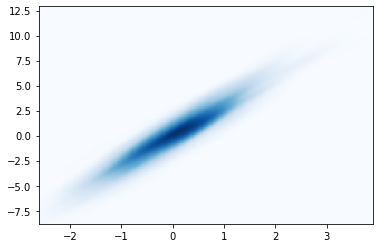

In [16]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap = "Blues")

### Faster Plotting with histogram2d

In [17]:
x, y = -np.log10(np.random.random_sample((2,10**4)))

CPU times: user 484 ms, sys: 4.06 ms, total: 488 ms
Wall time: 488 ms


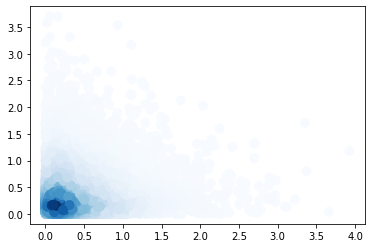

In [19]:
%%time
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, cmap = "Blues", s=100, edgecolor='none')

CPU times: user 61.6 ms, sys: 2.04 ms, total: 63.7 ms
Wall time: 62.5 ms


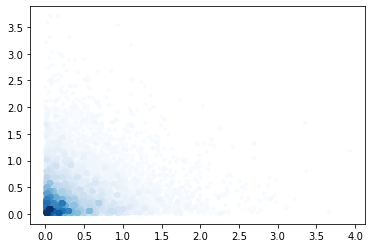

In [20]:
%%time

bins = [100, 100] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

plt.figure(1).clf()
s = plt.scatter(x2, y2, c=z2, cmap='Blues', marker='.')  

## Various Schemes: Seaborn

In [22]:
import seaborn as sns

### Contour Plot

In [23]:
df = sns.load_dataset('iris')[["sepal_width", "sepal_length"]]

In [24]:
display(df)

sepal_width  sepal_length
0            3.5           5.1
1            3.0           4.9
2            3.2           4.7
3            3.1           4.6
4            3.6           5.0
..           ...           ...
145          3.0           6.7
146          2.5           6.3
147          3.0           6.5
148          3.4           6.2
149          3.0           5.9

[150 rows x 2 columns]

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

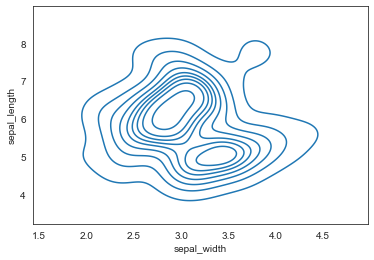

In [27]:
 # Basic 2D density plot
sns.set_style("white")
sns.kdeplot(df.sepal_width, df.sepal_length)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

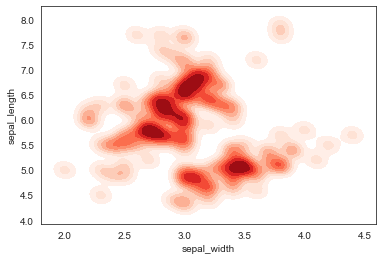

In [28]:
# Custom it with the same argument as 1D density plot
sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Reds", shade=True, bw=.15)

### Hexbin

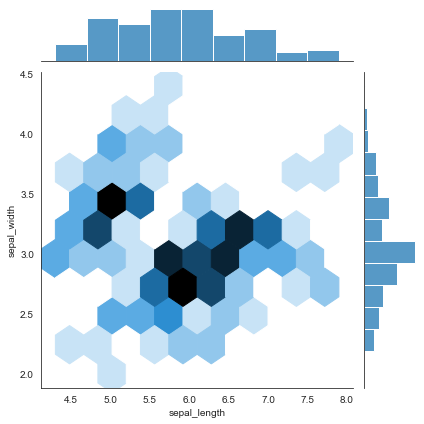

In [29]:
sns.jointplot(x = df["sepal_length"], y = df["sepal_width"], kind = 'hex')

## Various Schemes: mpl_scatter_density

In [30]:
import mpl_scatter_density

In [31]:
n = 10000000
x = np.random.normal(0.5, 0.3, n)
y = np.random.normal(0.5, 0.3, n)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


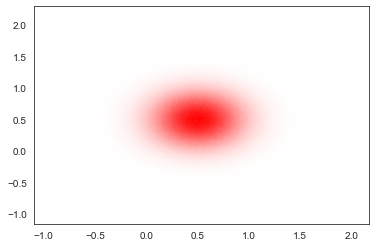

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
ax.scatter_density(x, y, color='red')

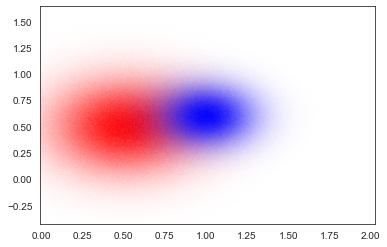

In [33]:
fig = plt.figure()

n = 10000000
x = np.random.normal(0.5, 0.3, n)
y = np.random.normal(0.5, 0.3, n)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
ax.scatter_density(x, y, color='red')

x = np.random.normal(1.0, 0.2, n)
y = np.random.normal(0.6, 0.2, n)

ax.scatter_density(x, y, color='blue')

### Non-linear stretches for high dynamic range plots

In [34]:
x, y = -np.log10(np.random.random_sample((2,10**6)))

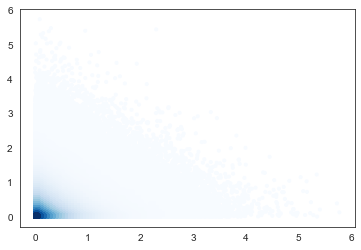

In [35]:
bins = [100, 100] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

plt.figure(1).clf()
s = plt.scatter(x2, y2, c=z2, cmap='Blues', marker='.')  

In [37]:
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=1000, stretch=LogStretch())

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


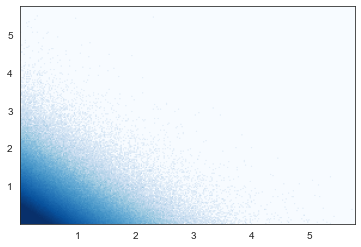

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
ax.scatter_density(x, y, norm=norm, cmap = "Blues")